In [1]:
import numpy as np
import pandas as pd
# leitura do banco de dados
input_file = '/Users/aurelianosancho/Google Drive/GeoFusion/DadosDesafioCientista.csv'
df = pd.read_csv(input_file)

In [2]:
# import das bibliotecas
from unidecode import unidecode
import sklearn
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sb 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import r2_score
from sklearn import model_selection
import sklearn.cluster as cluster
import time
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import SpectralClustering
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.mixture import GaussianMixture


%matplotlib inline
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

########## Clean #########################

Para resolver o problema da variável rendaMedia eu dupliquei o vetor e retirei os item que possuem o símbolo '-', calculei a média e no vetor original substitui os símbolos pela média.

In [3]:
d = df.drop(df[df["rendaMedia"] == '-'].index)
m = d['rendaMedia'].median()
print(m)

2134.0


In [4]:
df["rendaMedia"].fillna('2134', inplace=True) 
df["rendaMedia"] = df["rendaMedia"].str.replace('-','2134')

In [5]:
df["rendaMedia"] = df["rendaMedia"].astype(int)

############################################

# Q2: Classificar o potencial de cada bairro como Alto, Médio ou Baixo

In [6]:
# Para realizar a classificação alguns passos realizados na regressão linear são repetidos aqui.
# Isto é feito novamente pois os dados são diferentes, aqui o target é o potencial e eu tb incluí nos dados de SP
# o resultado encontrado para o faturamento no ponto anterior.

In [7]:
df_SP = df[df["estado"]=='SP']
df_RJ = df[df["estado"]=='RJ']

#df_SP["faturamento"]= Y_pred
#df_RJ["faturamento"]= Y_pred

df_SP_test2 = df_SP.drop(['codigo','nome', 'cidade', 'estado','potencial','faturamento'], axis=1)
scaler = preprocessing.StandardScaler()
df_SP_test2 = scaler.fit_transform(df_SP_test2)

In [9]:
df_RJ.head(3)

,codigo,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento,potencial
0,3304557060,Abolição,Rio de Janeiro,RJ,11676,1027,483,688,800,1675,2300,1784,2919,0,145,715,1242,1093,758,92,304,2501,932515.0,Médio
1,3304557138,Acari,Rio de Janeiro,RJ,27564,5131,2188,2697,2630,4810,5308,2403,2397,0,0,82,506,2040,2490,827,2506,931,588833.0,Baixo
2,3304557057,Água Santa,Rio de Janeiro,RJ,9003,883,399,597,762,1755,2076,1112,1419,0,96,404,652,644,522,77,254,2391,874200.0,Baixo


In [10]:
df_reg_target = df_RJ.loc[:,['potencial']]
df_reg_features = df_RJ.drop(['potencial'], axis=1)
df_reg_features = df_reg_features.drop(['codigo','nome', 'cidade', 'estado'], axis=1)

In [11]:
ord_enc = OrdinalEncoder()
df_reg_target["potencial"] = ord_enc.fit_transform(df_reg_target[["potencial"]])

In [16]:
#df_reg_target.head(30)

In [26]:
X = np.array(df_reg_features)
y = np.array(df_reg_target).reshape(-1,)

In [27]:
y

array([2., 1., 1., 2., 2., 0., 1., 1., 0., 0., 1., 1., 1., 0., 2., 0., 0.,
       0., 1., 1., 1., 1., 2., 0., 2., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 2., 0., 2., 2., 2., 1., 2., 1., 1., 2., 1., 2., 0., 0., 1., 0.,
       2., 2., 2., 1., 1., 0., 1., 2., 0., 1., 2., 2., 2., 1., 0., 2., 2.,
       0., 0., 0., 1., 0., 1., 1., 0., 2., 0., 2., 2., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 2., 0., 1., 0., 2., 0., 2., 2., 0., 1., 1., 2.,
       1., 2., 0., 1., 0., 0., 0., 1., 1., 2., 2., 0., 1., 2., 0., 0., 0.,
       2., 1., 1., 1., 2., 2., 2., 1., 2., 0., 2., 1., 2., 2., 1., 1., 2.,
       1., 2., 2., 0., 2., 0., 0., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1.,
       0., 0., 2., 2., 0., 1., 1.])

Automatically created module for IPython interactive environment
[1. 0. 0. 1. 2. 1. 2. 2. 1. 0. 1. 0. 0. 2. 2. 1. 0. 2. 0. 0. 0. 1. 1. 0.
 1. 1. 2. 0. 2. 0. 1. 2. 1. 2. 1. 2. 1. 1. 0. 2. 1. 2. 0. 2. 1. 0. 0. 2.
 1. 2. 1. 1. 0. 0. 1. 1. 2. 0. 1. 2. 2. 2. 1. 2.]
Nearest Neighbors
Acuracy:  0.796875
Precision:  0.796875
Recall:  0.796875
Score:  0.796875


ValueError: query data dimension must match training data dimension

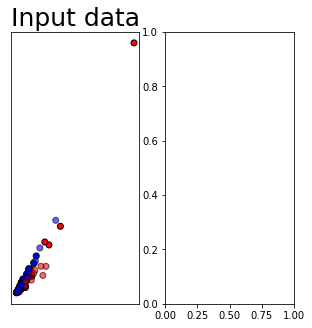

In [28]:
print(__doc__)


# Aparentemente funciona para casos binários

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3)
    #SVC(kernel="linear", C=0.025),
    #SVC(gamma=2, C=1),
    #GaussianProcessClassifier(1.0 * RBF(1.0)),
    #DecisionTreeClassifier(max_depth=5),
    #RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    #MLPClassifier(alpha=1, max_iter=1000),
    #AdaBoostClassifier(),
    #GaussianNB(),
    #QuadraticDiscriminantAnalysis()]


linearly_separable = (X, y)

datasets = [linearly_separable]

figure = plt.figure(figsize=(30, 5))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data",size=25)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        y_pred = clf.predict(X_test)
        #print(score)
        print(y_test)
        print(name)
        print('Acuracy: ', accuracy_score(y_test, y_pred))
        print('Precision: ', precision_score(y_test, y_pred, average='micro'))
        print('Recall: ' , recall_score(y_test, y_pred, average='micro'))
        print('Score: ', score)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name, size=16)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()